## Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import joblib

## Importing Data

In [2]:
df = pd.read_csv('housing.csv')
df = df[~(df['MEDV'] >= 50.0)]

In [3]:
df.shape

(490, 14)

In [4]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## EDA

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df['CHAS'].value_counts()

0    461
1     29
Name: CHAS, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 14 columns):
CRIM       490 non-null float64
ZN         490 non-null float64
INDUS      490 non-null float64
CHAS       490 non-null int64
NOX        490 non-null float64
RM         490 non-null float64
AGE        490 non-null float64
DIS        490 non-null float64
RAD        490 non-null int64
TAX        490 non-null int64
PTRATIO    490 non-null float64
B          490 non-null float64
LSTAT      490 non-null float64
MEDV       490 non-null float64
dtypes: float64(11), int64(3)
memory usage: 57.4 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,490.0,3.643241,8.722154,0.00632,0.082045,0.24751,3.647422,88.9762
ZN,490.0,11.112245,22.844626,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,490.0,11.113143,6.821302,0.74000,5.190000,9.69000,18.100000,27.7400
CHAS,490.0,0.059184,0.236209,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,490.0,0.554307,0.116688,0.38500,0.449000,0.53800,0.624000,0.8710
RM,490.0,6.245471,0.653147,3.56100,5.881000,6.18500,6.578000,8.7800
AGE,490.0,68.278980,28.164790,2.90000,44.550000,76.80000,93.875000,100.0000
DIS,490.0,3.834519,2.109948,1.13700,2.111050,3.27590,5.214600,12.1265
RAD,490.0,9.514286,8.691297,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,490.0,408.002041,168.065190,187.00000,280.250000,330.00000,666.000000,711.0000


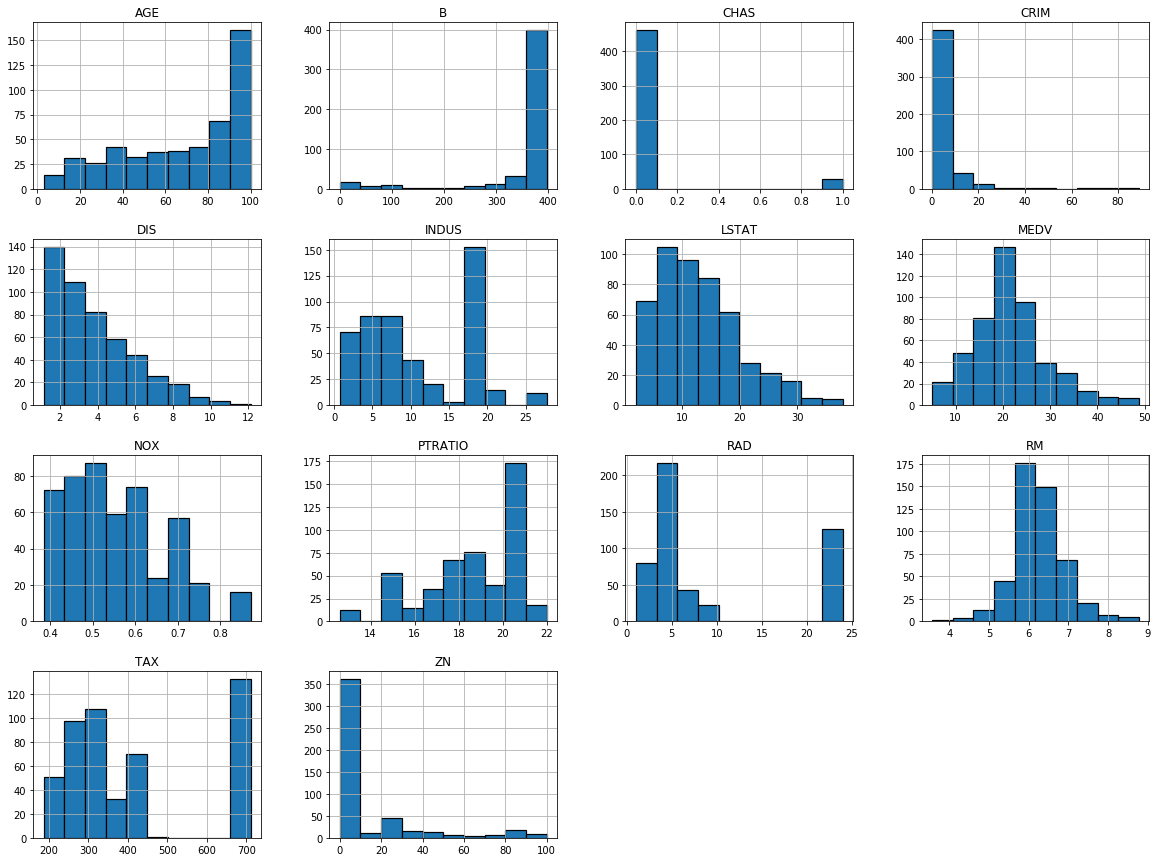

In [11]:
df.hist(edgecolor = 'black', linewidth = 1.2, figsize=(20,15))
plt.show()

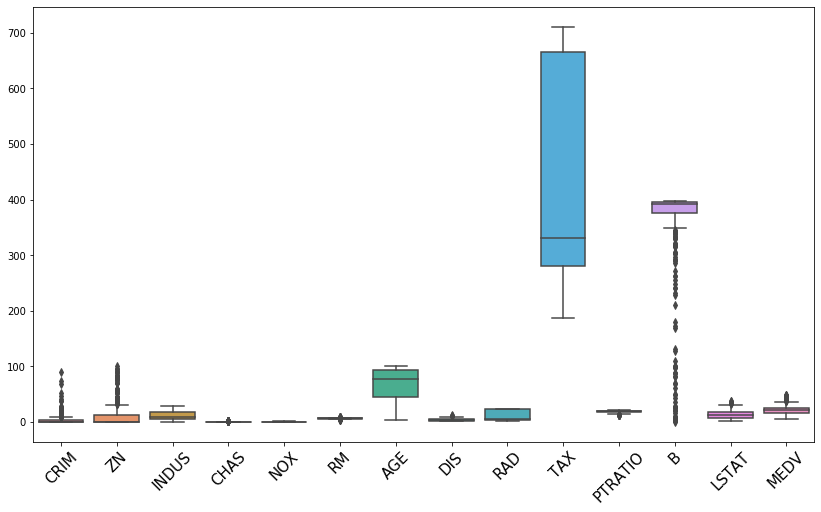

In [12]:
plt.figure(figsize=(14,8))
sns.boxplot(data = df)
plt.xticks(rotation=45, fontsize=15)
plt.show()

## Feature Selection

### Using Correlation Matrix

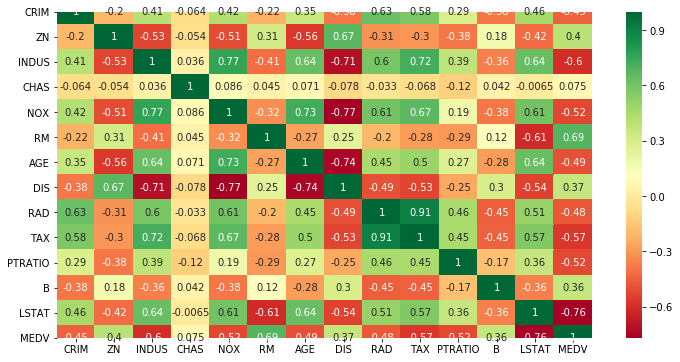

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

#### Selecting Highly Correlated Features

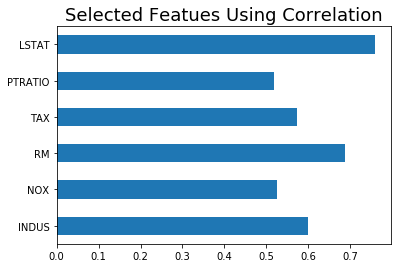

In [14]:
correlation = df.corr()
corr = abs(correlation['MEDV'])
target_features = corr[corr > 0.5]
target_features.drop('MEDV', inplace=True)
target_features.plot(kind = 'barh')
plt.title('Selected Featues Using Correlation', fontsize=18)
plt.show()

### Using Lasso Regression

In [15]:
from sklearn.linear_model import LassoCV
model = LassoCV(cv=5)
model.fit(X, y)
print(f'Best Alpha using LassoCV: %f' % model.alpha_)
print(f'Best Score using LassoCV: %f' % model.score(X, y))
coef = pd.Series(model.coef_, index=X.columns)

print(f'Lasso Picked {str(sum(coef != 0))} featres and removed other {str(sum(coef == 0))} featres')

Best Alpha using LassoCV: 0.755157
Best Score using LassoCV: 0.730376
Lasso Picked 11 featres and removed other 2 featres


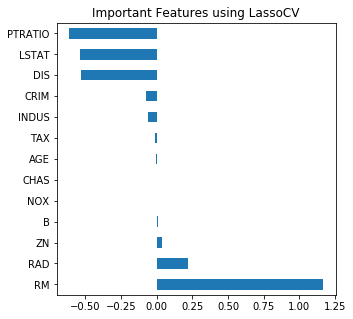

In [16]:
imp_features = coef.sort_values(ascending=False)
plt.figure(figsize=(5,5))
imp_features.plot(kind= 'barh')
plt.title('Important Features using LassoCV')
plt.show()

## Train Test Split

In [17]:
X = df[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'NOX', 'TAX', 'AGE', 'CRIM']]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Checking Accuracy for Different Models

### Without Scaling Data

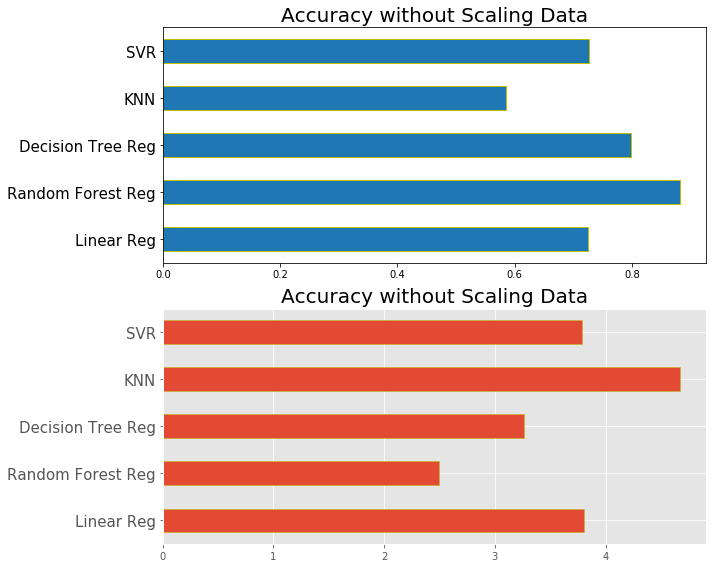

In [18]:
accuracy = []
rmse = []
models = pd.Series([LinearRegression(), RandomForestRegressor(n_estimators=100), DecisionTreeRegressor(), 
                    KNeighborsRegressor(n_neighbors=3), SVR(kernel='linear', gamma='auto')])
regression = pd.Series(['Linear Reg', 'Random Forest Reg', 'Decision Tree Reg', 'KNN', 'SVR'])
for i in models:
    model = i
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(model.score(X_test, y_test))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
d = {'Accuracy': accuracy, 'RMSE' : rmse}
a = pd.DataFrame(d, index=regression)
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
a['Accuracy'].plot(kind = 'barh', edgecolor = 'y')
plt.style.use('ggplot')
plt.title('Accuracy without Scaling Data', fontsize = 20)
plt.yticks(fontsize=15)
plt.subplot(2,1,2)
a['RMSE'].plot(kind = 'barh', edgecolor = 'y')
plt.style.use('ggplot')
plt.title('Accuracy without Scaling Data', fontsize = 20)
plt.yticks(fontsize=15)
plt.tight_layout(h_pad=0.8)
plt.show()

### Using Scaled Data

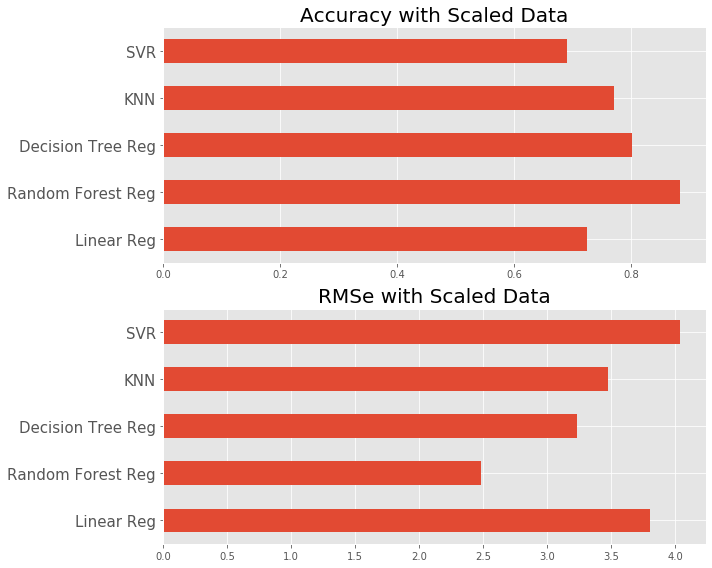

In [19]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
accuracy = []
rmse = []
models = pd.Series([LinearRegression(), RandomForestRegressor(n_estimators=100), DecisionTreeRegressor(), 
                    KNeighborsRegressor(n_neighbors=3), SVR(kernel='linear', gamma='auto')])
regression = pd.Series(['Linear Reg', 'Random Forest Reg', 'Decision Tree Reg', 'KNN', 'SVR'])
for i in models:
    model = i
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(model.score(X_test, y_test))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
d = {'Accuracy': accuracy, 'RMSE' : rmse}
a = pd.DataFrame(d, index=regression)
# print(a)
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
a['Accuracy'].plot(kind = 'barh')
plt.title('Accuracy with Scaled Data', fontsize= 20)
plt.yticks(fontsize=15)
plt.subplot(2,1,2)
a['RMSE'].plot(kind = 'barh')
plt.title('RMSe with Scaled Data', fontsize= 20)
plt.yticks(fontsize=15)
plt.tight_layout(h_pad=0.8)
plt.show()

## Resacling and Normalizing Data in Pipeline

In [20]:
steps = [('scaler', StandardScaler()), ('RFR', RandomForestRegressor(n_estimators=100))]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)
# print(pipeline.score(X_test, y_test))

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RFR',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

### Saving Model

In [21]:
from joblib import dump, load
dump(pipeline, 'price_pred_model.pkl')
a = load('price_pred_model.pkl')
print(a.score(X_test, y_test))

0.8787411558595517
